In [1]:
import scipy.io as sio 
import warnings
warnings.filterwarnings('ignore')

train = sio.loadmat('./train.mat')
test = sio.loadmat('./test.mat')
print(train.keys())
print(test.keys())


x_train = train['X'].swapaxes(0,3).swapaxes(2,3).swapaxes(1,2)
y_train = train['y']
x_test = test['X'].swapaxes(0,3).swapaxes(2,3).swapaxes(1,2)
y_test = test['y']

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

dict_keys(['y', '__version__', '__globals__', 'X', '__header__'])
dict_keys(['y', '__version__', '__globals__', 'X', '__header__'])
x_train shape: (73257, 32, 32, 3)
y_train shape: (73257, 1)
73257 train samples
26032 test samples


In [2]:
y_train[y_train== 10] = 0
y_test[y_test== 10] = 0

x_train = x_train[:,:,:,0]
x_test = x_test[:,:,:,0]

# img_rows = 32
# img_cols = 32

# x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
# x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (73257, 32, 32)
x_test shape: (26032, 32, 32)


In [3]:
from keras.layers import Input, Dense
from keras.models import Model

import warnings
warnings.filterwarnings('ignore')
# this is the size of our encoded representations
encoding_dim = 64  

# this is our input placeholder
input_img = Input(shape=(1024,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(1024, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

Using TensorFlow backend.


In [4]:
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                nb_epoch=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 73257 samples, validate on 26032 samples
Epoch 1/20
73257/73257 [==============================] - 1s 20us/step - loss: 0.6926 - val_loss: 0.6922
Epoch 2/20
73257/73257 [==============================] - 1s 9us/step - loss: 0.6912 - val_loss: 0.6909
Epoch 3/20
73257/73257 [==============================] - 1s 9us/step - loss: 0.6894 - val_loss: 0.6881
Epoch 4/20
73257/73257 [==============================] - 1s 8us/step - loss: 0.6861 - val_loss: 0.6828
Epoch 5/20
73257/73257 [==============================] - 1s 9us/step - loss: 0.6816 - val_loss: 0.6767
Epoch 6/20
73257/73257 [==============================] - 1s 9us/step - loss: 0.6774 - val_loss: 0.6706
Epoch 7/20
73257/73257 [==============================] - 1s 9us/step - loss: 0.6724 - val_loss: 0.6593
Epoch 8/20
73257/73257 [==============================] - 1s 9us/step - loss: 0.6639 - val_loss: 0.6470
Epoch 9/20
73257/73257 [==============================] - 1s 9us/step - loss: 0.6542 - val_loss: 0.6369
Epoch 10/20
7

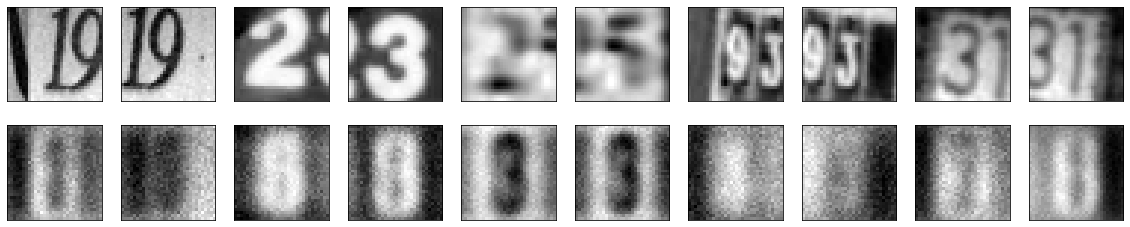

In [7]:

import matplotlib.pyplot as plt
%matplotlib inline

x_train_decoder = autoencoder.predict(x_train)
x_test_decoder = autoencoder.predict(x_test)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_train[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(x_train_decoder[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
x_train_decoder = x_train_decoder.reshape(len(x_train_decoder),32,32,1)
x_test_decoder = x_test_decoder.reshape(len(x_test_decoder),32,32,1)

print(x_train_decoder.shape,x_test_decoder.shape)

(73257, 32, 32, 1) (26032, 32, 32, 1)


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import warnings
warnings.filterwarnings('ignore')

batch_size = 32
num_classes = 10
epochs = 10

In [10]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (73257, 10)
y_test shape: (26032, 10)


In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train_decoder.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [12]:
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [13]:
x_train_decoder = x_train_decoder.astype('float32')
x_test_decoder = x_test_decoder.astype('float32')
x_train_decoder /= 255
x_test_decoder /= 255

history = LossHistory()

model.fit(x_train_decoder, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_decoder, y_test),
          shuffle=True,
         callbacks=[history])

# Score trained model.
scores = model.evaluate(x_test_decoder, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 11s 145us/step - loss: 2.2414 - acc: 0.1891 - val_loss: 2.2256 - val_acc: 0.1959
Epoch 2/10
73257/73257 [==============================] - 9s 128us/step - loss: 2.2393 - acc: 0.1892 - val_loss: 2.2266 - val_acc: 0.1959
Epoch 3/10
73257/73257 [==============================] - 9s 127us/step - loss: 2.2388 - acc: 0.1892 - val_loss: 2.2252 - val_acc: 0.1959
Epoch 4/10
73257/73257 [==============================] - 9s 127us/step - loss: 2.2381 - acc: 0.1892 - val_loss: 2.2248 - val_acc: 0.1959
Epoch 5/10
73257/73257 [==============================] - 9s 126us/step - loss: 2.2377 - acc: 0.1892 - val_loss: 2.2253 - val_acc: 0.1959
Epoch 6/10
73257/73257 [==============================] - 9s 128us/step - loss: 2.2379 - acc: 0.1892 - val_loss: 2.2234 - val_acc: 0.1959
Epoch 7/10
73257/73257 [==============================] - 9s 128us/step - loss: 2.2376 - acc: 0.1892 - val_loss: 2.2253 -

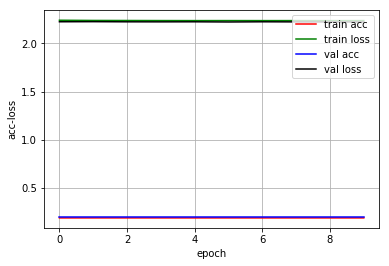

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

history.loss_plot('epoch')